In [1]:
import sys
import numpy as np
import sympy as sp
from numpy.linalg import inv
from scipy.stats import f

sys.path.append('C:\\Users\\Mark\\PycharmProjects\\machineLearningNstu')

from src.data.varianсe_analysis import get_two_factor_observation_matrix

# Матрица наблюдений

In [2]:
X: np.array = get_two_factor_observation_matrix(3, 4, 2)
print(X.shape)
sp.Matrix(X)

(24, 8)


Matrix([
[1, 1, 0, 0, 1, 0, 0, 0],
[1, 1, 0, 0, 1, 0, 0, 0],
[1, 1, 0, 0, 0, 1, 0, 0],
[1, 1, 0, 0, 0, 1, 0, 0],
[1, 1, 0, 0, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 0, 0, 1],
[1, 1, 0, 0, 0, 0, 0, 1],
[1, 0, 1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 1, 0, 0],
[1, 0, 1, 0, 0, 1, 0, 0],
[1, 0, 1, 0, 0, 0, 1, 0],
[1, 0, 1, 0, 0, 0, 1, 0],
[1, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 1, 1, 0, 0, 0],
[1, 0, 0, 1, 1, 0, 0, 0],
[1, 0, 0, 1, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 0, 1, 0],
[1, 0, 0, 1, 0, 0, 1, 0],
[1, 0, 0, 1, 0, 0, 0, 1],
[1, 0, 0, 1, 0, 0, 0, 1]])

In [1]:
import sys
import numpy as np
import sympy as sp
from numpy.linalg import inv
from scipy.stats import f

sys.path.append('C:\\Users\\Mark\\PycharmProjects\\machineLearningNstu')

from src.data.varianсe_analysis import get_two_factor_observation_matrix

# Редуцирование модели

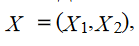

In [3]:
X_1: np.ndarray = np.delete(X, [3, -1], axis=1)
print(X_1.shape)
sp.Matrix(X_1)

(24, 6)


Matrix([
[1, 1, 0, 1, 0, 0],
[1, 1, 0, 1, 0, 0],
[1, 1, 0, 0, 1, 0],
[1, 1, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 1],
[1, 1, 0, 0, 0, 1],
[1, 1, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0],
[1, 0, 1, 1, 0, 0],
[1, 0, 1, 1, 0, 0],
[1, 0, 1, 0, 1, 0],
[1, 0, 1, 0, 1, 0],
[1, 0, 1, 0, 0, 1],
[1, 0, 1, 0, 0, 1],
[1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0]])

In [4]:
X_2: np.ndarray = X[:, [3, -1]]
print(X_2.shape)
sp.Matrix(X_2)

(24, 2)


Matrix([
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 1],
[0, 1],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 1],
[0, 1],
[1, 0],
[1, 0],
[1, 0],
[1, 0],
[1, 0],
[1, 0],
[1, 1],
[1, 1]])

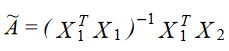

In [5]:
А_wavy: np.ndarray = np.round(np.dot(np.dot(inv(np.dot(X_1.T, X_1)), X_1.T), X_2), 4)
print(А_wavy.shape)
sp.Matrix(А_wavy)

(6, 2)


Matrix([
[ 1.0,  1.0],
[-1.0,    0],
[-1.0,    0],
[   0, -1.0],
[   0, -1.0],
[   0, -1.0]])

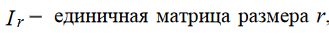

In [6]:
I_r: np.ndarray = np.eye(6)
print(I_r.shape)
sp.Matrix(I_r)

(6, 6)


Matrix([
[1.0,   0,   0,   0,   0,   0],
[  0, 1.0,   0,   0,   0,   0],
[  0,   0, 1.0,   0,   0,   0],
[  0,   0,   0, 1.0,   0,   0],
[  0,   0,   0,   0, 1.0,   0],
[  0,   0,   0,   0,   0, 1.0]])

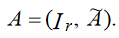

In [7]:
A: np.ndarray = np.hstack([I_r, А_wavy])
print(A.shape)
sp.Matrix(A) 

(6, 8)


Matrix([
[1.0,   0,   0,   0,   0,   0,  1.0,  1.0],
[  0, 1.0,   0,   0,   0,   0, -1.0,    0],
[  0,   0, 1.0,   0,   0,   0, -1.0,    0],
[  0,   0,   0, 1.0,   0,   0,    0, -1.0],
[  0,   0,   0,   0, 1.0,   0,    0, -1.0],
[  0,   0,   0,   0,   0, 1.0,    0, -1.0]])

In [8]:
X_reduced: np.ndarray = np.round(np.dot(X_1, A), 4)
print(X_reduced.shape)
sp.Matrix(X_reduced)

(24, 8)


Matrix([
[1.0, 1.0,   0, 1.0,   0,   0,   0,   0],
[1.0, 1.0,   0, 1.0,   0,   0,   0,   0],
[1.0, 1.0,   0,   0, 1.0,   0,   0,   0],
[1.0, 1.0,   0,   0, 1.0,   0,   0,   0],
[1.0, 1.0,   0,   0,   0, 1.0,   0,   0],
[1.0, 1.0,   0,   0,   0, 1.0,   0,   0],
[1.0, 1.0,   0,   0,   0,   0,   0, 1.0],
[1.0, 1.0,   0,   0,   0,   0,   0, 1.0],
[1.0,   0, 1.0, 1.0,   0,   0,   0,   0],
[1.0,   0, 1.0, 1.0,   0,   0,   0,   0],
[1.0,   0, 1.0,   0, 1.0,   0,   0,   0],
[1.0,   0, 1.0,   0, 1.0,   0,   0,   0],
[1.0,   0, 1.0,   0,   0, 1.0,   0,   0],
[1.0,   0, 1.0,   0,   0, 1.0,   0,   0],
[1.0,   0, 1.0,   0,   0,   0,   0, 1.0],
[1.0,   0, 1.0,   0,   0,   0,   0, 1.0],
[1.0,   0,   0, 1.0,   0,   0, 1.0,   0],
[1.0,   0,   0, 1.0,   0,   0, 1.0,   0],
[1.0,   0,   0,   0, 1.0,   0, 1.0,   0],
[1.0,   0,   0,   0, 1.0,   0, 1.0,   0],
[1.0,   0,   0,   0,   0, 1.0, 1.0,   0],
[1.0,   0,   0,   0,   0, 1.0, 1.0,   0],
[1.0,   0,   0,   0,   0,   0, 1.0, 1.0],
[1.0,   0,   0,   0,   0,

# МНК-оценивание редуцированной модели

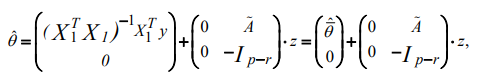

In [9]:
Y = [
    # A1
    3.1, 2.9, 
    4.1, 3.9, 
    2.1, 1.9,
    2.1, 1.9,
    # A2
    3.9, 4.1, 
    4.9, 5.1,
    2.9, 3.1,
    3.0, 3.0,
    # A3
    2.1, 1.9,
    3.1, 2.9,
    1.1, 0.9,
    1.0, 1.0
]
Y: np.array = np.array([Y]).T
print(Y.shape)
sp.Matrix(Y)

(24, 1)


Matrix([
[3.1],
[2.9],
[4.1],
[3.9],
[2.1],
[1.9],
[2.1],
[1.9],
[3.9],
[4.1],
[4.9],
[5.1],
[2.9],
[3.1],
[3.0],
[3.0],
[2.1],
[1.9],
[3.1],
[2.9],
[1.1],
[0.9],
[1.0],
[1.0]])

In [10]:
theta_dashed: np.ndarray = np.round(np.dot(np.dot(inv(np.dot(X_1.T, X_1)), X_1.T), Y), 4)
print(theta_dashed.shape)
sp.Matrix(theta_dashed)

(6, 1)


Matrix([
[1.0],
[1.0],
[2.0],
[1.0],
[2.0],
[  0]])

# Проверка гипотез

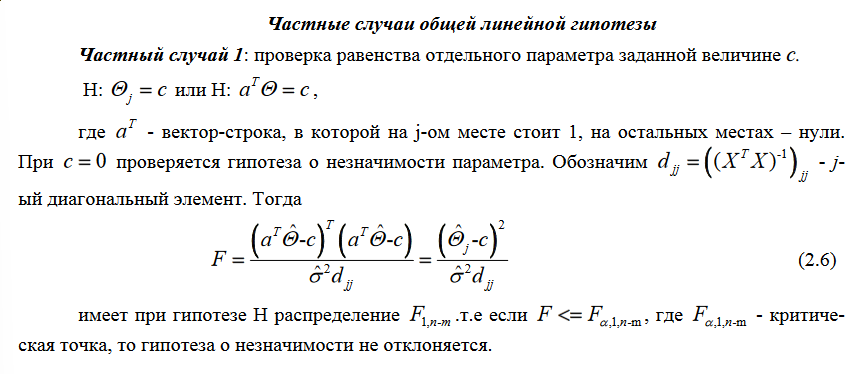

# Проверка гипотез о незначимости различий в эффектах уровней

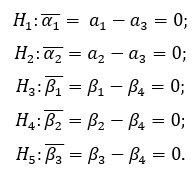

In [62]:
a_i = [theta_dashed[i + 1] for i in range(theta_dashed.shape[0] - 1)]
a_i_ld = [0] * 5
c: int = 0
variance: float = np.var(Y)
d: np.ndarray = np.diag(inv(X_1.T @ X_1))

d_jj = [value for value in d]
d_jj.pop(0)
variance

1.3624999999999998

In [58]:
def get_f_critical(alpha: float = 0.05, dfn: int = 7, dfd: int = 24) -> float:
    """
    Поиск квантиля распределения Фишера.
    
    alpha - Уровень значимости.
    dfn - Число факторов.
    dfd - Размер выборки.
    """
    return f.ppf(1 - alpha, dfn, dfd)

In [67]:
get_f_critical()

2.4226285334209154

In [ ]:
def check_hypothesis(a_i: np.ndarray, a_i_ld: np.ndarray, d_jj: float, theta_dashed: np.ndarray = theta_dashed) -> None:
    """
    a_i - Линейно независимый член.
    a_i_ld - Линейно зависимый член.
    d_jj  - Диагональный элемент.
    """
    F_a: float = get_f_critical()
    variance: float = np.var(Y)
    c: int = 0

    F: np.ndarray = ((a_i - a_i_ld - c) ** 2) / (variance ** 2 * d_jj)
    print()

    print('Гипотеза о незначимости верна!') if F <= F_a else print('Гипотеза о незначимости не верна!')

In [ ]:
list(map(check_hypothesis, a_i, a_i_ld, d_jj))